In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import re  #正则表达式
import nltk 
import jieba 
import jieba.posseg as psg 



In [2]:
data=pd.read_csv('D:/douban_comments.csv') #读入豆瓣评论数据
data.info()  #查看数据信息
data=data.head(100)  #取前1000行数据
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99844 entries, 0 to 99843
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     99825 non-null  object 
 1   Star     99756 non-null  float64
 2   Comment  99756 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


,Date,Star,Comment
0,2015/5/13,3.0,连奥创都知道整容要去韩国。
1,2015/4/24,2.0,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...
2,2015/4/26,2.0,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...
3,2015/4/23,4.0,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...
4,2015/4/22,2.0,虽然从头打到尾，但是真的很无聊啊。
...,...,...,...
95,2015/4/26,2.0,Shi一样的剧情啊
96,2015/5/13,2.0,通篇洋溢着「我鸡巴大我先说」的直男气息，但紧身衣又出卖了它
97,2015/5/12,3.0,刘大勇你好！字幕翻译太烂了，节奏不连贯，没看过前作的观众肯定晕菜。场面很炫酷，故事性较差，...
98,2015/4/28,3.0,跟笑点满满，热血高能的前作相比，这一部平庸太多。讲述超级英雄的黑暗面却也没有进行深挖，主角...


## 只保留汉字

In [3]:
# comment_cut=[]
str1=''
pos=True
all_list=[]
for i in range(data.shape[0]): #data.shape[0] 行数
    str1=data.iloc[i][2]  #数据第三列
    for uchar in str1:
        # 判断是否为汉字
        if uchar >= u'\u4e00' and uchar<=u'\u9fa5':
            continue
#          # 判断是否为数字
#         if uchar >= u'\u0030' and uchar<=u'\u0039':    
#             continue
#         # 判断是否为英文字母
# #         if (uchar >= u'\u0041' and uchar<=u'\u005a') or (uchar >= u'\u0061' and uchar<=u'\u007a'):     
# #             continue
        else:
            str1 = str1.replace(uchar, '')   #替换为空字符
            
    all_list+= ['  '.join(jieba.cut(str1))]  #分词结果

print(all_list)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yaojh\AppData\Local\Temp\jieba.cache
Loading model cost 0.820 seconds.
Prefix dict has been built successfully.


['连  奥创  都  知道  整容  要  去  韩国', '非常  失望  剧本  完全  敷衍了事  主线  剧情  没  突破  大家  可以  理解  可  所有  的  人物  都  缺乏  动机  正邪  之间  妇联  内部  都  没什么  火花  团结  分裂  团结  的  三段式  虽然  老套  但  其实  也  可以  利用  积攒  下来  的  形象  魅力  搞  出  意思  但  剧本  写得  非常  肤浅  平面  场面  上  调度  混乱  呆板  满屏  的  铁甲  审美疲劳  只有  笑  点算  得  上  差强人意', '年度  最  失望  作品  以为  面面俱到  实则  画蛇添足  以为  主题深刻  实则  老调重弹  以为  推陈出新  实则  俗不可耐  以为  场面  很  实则  劲  不足  气上  一集  的  趣味  全无  这集  的  笑  点  明显  刻意  到  心虚  全片  没有  任何  片段  给  我  有  紧张  激动  的  时候  太弱  了  跟  奥创  一样', '铁人  中  勾引  钢铁  侠  妇联  中  勾引  鹰眼  美队  中  勾引  美国  队长  在  妇联  中  终于  跟  绿巨人  表白  了  黑寡妇  用  实际行动  告诉  了  我们  什么  叫  忠贞不二  而且  为了  治疗  不孕  不育  连  作战  武器  都  变成  了  两支  验孕  棒  坚决  相信  快银  没有  死  后面  还  得  回来', '虽然  从头  打到  尾  但是  真的  很  无聊  啊', '剧情  不如  第一集  好玩  了  全靠  密集  笑点  在  提神  僧多粥少  的  直接  后果  就是  每部  寡姐  都  要  换  着  队友  谈恋爱  这特  么  比  打斗  还  辛苦  啊  真心  求  放过  结尾  彩蛋  还  以为  是  洛基  呢  结果  我  呸', '只有  一颗  彩蛋  必须  降一星  外加  漫威  的  编剧  是  有心无力  了  吧  复仇者  联盟  只能  永远  着手  与  团队  的  和  与  不  和  这种  东西 

## 词袋子模型 

In [4]:
corpus=all_list
stopword_list=open('stopword.txt',encoding='utf-8').read().replace('\n', ' ').split() #读入停用词
from sklearn.feature_extraction.text import CountVectorizer
# 对CountVectorizer进行初始化（去除中文停用词）
vectorizer = CountVectorizer(stop_words=stopword_list,ngram_range=(1, 1)) #创建词袋子  1元 和2元，默认1元
dt = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out()[:100])  #输出前100个特征
print(dt.toarray())  

['一丝' '一个系列' '一出' '一刀' '一到' '一刷' '一发' '一句' '一回' '一场' '一处' '一大' '一套' '一对'
 '一小' '一幕' '一打' '一把' '一招' '一本' '一本正经' '一条' '一步' '一点' '一盘散沙' '一目了然' '一碗'
 '一种' '一笔带过' '一脸' '一般般' '一身' '一遍' '一部' '一集' '一顿' '一颗' '万磁王' '三个' '三年' '三星'
 '三段式' '三部曲' '上映' '下半年' '下场' '下坡路' '不人染' '不住' '不作' '不像' '不减' '不到' '不多'
 '不太' '不孕' '不带' '不死本' '不算' '不育' '不行' '不足之处' '不连贯' '不错' '专供' '世界' '世界观'
 '东欧' '东西' '丝毫' '两个' '两份' '两支' '两星' '两次' '两种' '严肃' '个个' '中二病' '中庸' '为啥'
 '主公' '主线' '主角' '主题曲' '主题深刻' '之人' '之作' '之战' '之极' '之间' '乏味' '乔斯' '乱七八糟'
 '事情' '二人' '二刷' '于剧' '互动' '互殴']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


C:\Users\yaojh\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', 'nbsp'] not in stop_words.
  warnings.warn(


## TFIDF 

In [18]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopword_list,ngram_range=(1, 2))#参数默认1元
tfidf = vectorizer.fit_transform(corpus) #计算tfidf
weight = tfidf.toarray()
word = vectorizer.get_feature_names_out() #所有特征
print(word[:50])#打印前50个特征
print(weight)
words_dict = {}
# 打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for遍历某一类文本下的词语权重  
for i in range(len(weight)):
    for j in range(len(word)):  
        if word[j] in words_dict:
            words_dict[word[j]] += weight[i][j]
        else:
            words_dict[word[j]] = weight[i][j]
print(words_dict)

['一丝' '一丝 无力感' '一个系列' '一个系列 起到' '一出' '一出 硝烟弥漫' '一刀' '一刀 好几刀' '一到' '一到 不住'
 '一刷' '一刷 归来' '一发' '一发 捂脸' '一句' '一句 短评' '一句 老万是' '一回' '一回 电影' '一场' '一场 戏会'
 '一处' '一处 走心' '一大' '一大 文戏' '一套' '一套 联盟' '一对' '一对 猩红' '一小' '一小 段末句' '一幕'
 '一幕 燃到' '一打' '一打 特效' '一把' '一把 声音' '一招' '一招 鲜吃遍' '一本' '一本 真的' '一本正经'
 '一本正经 无趣' '一条' '一条 家庭' '一步' '一步 灭霸' '一点' '一点 黑寡妇' '一盘散沙']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.13668651 0.13668651 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
{'一丝': 0.13668651270806945, '一丝 无力感': 0.13668651270806945, '一个系列': 0.2156116561524502, '一个系列 起到': 0.2156116561524502, '一出': 0.12267173414675304, '一出 硝烟弥漫': 0.12267173414675304, '一刀': 0.4472135954999579, '一刀 

## LSA 

In [22]:
#LSA
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(5)
X1=svd.fit_transform(tfidf)
print(X1)

[[ 3.68885990e-01  2.73980845e-01 -1.06950922e-02 -3.88487319e-02
  -7.77996200e-02]
 [ 6.77914073e-02 -1.40235230e-01  1.86688931e-01  3.06516878e-02
   3.48109416e-02]
 [ 1.44983061e-01  4.84437946e-02  8.34365019e-02  1.38651877e-02
   9.58783951e-05]
 [ 9.61552728e-02 -1.54163474e-01 -1.15145217e-01 -2.63006861e-01
   2.79502483e-02]
 [ 1.72139822e-02 -1.06017748e-01 -6.82693380e-02 -1.23787332e-01
   1.47836921e-02]
 [ 8.91510034e-02 -1.91159803e-01  1.43662770e-01 -1.60049305e-01
  -3.01439543e-02]
 [ 6.34434644e-02 -1.09838295e-01 -8.26284234e-02  9.10601456e-02
   9.05478512e-02]
 [ 9.12794180e-03  5.77732904e-03 -5.70101580e-02 -1.28846697e-02
  -4.22360961e-02]
 [ 2.82492732e-01  7.71285377e-02  1.42769380e-01  1.96769054e-01
   1.14119553e-01]
 [ 1.15052214e-01 -1.44951856e-01 -1.67301730e-01 -1.63626231e-02
  -7.01678249e-02]
 [ 6.58017350e-02 -3.59967434e-02 -6.13713066e-02 -6.71826733e-03
  -8.59290145e-02]
 [ 4.24027118e-02 -2.42892747e-02 -7.38513901e-02  1.24991009e-01

## 词云

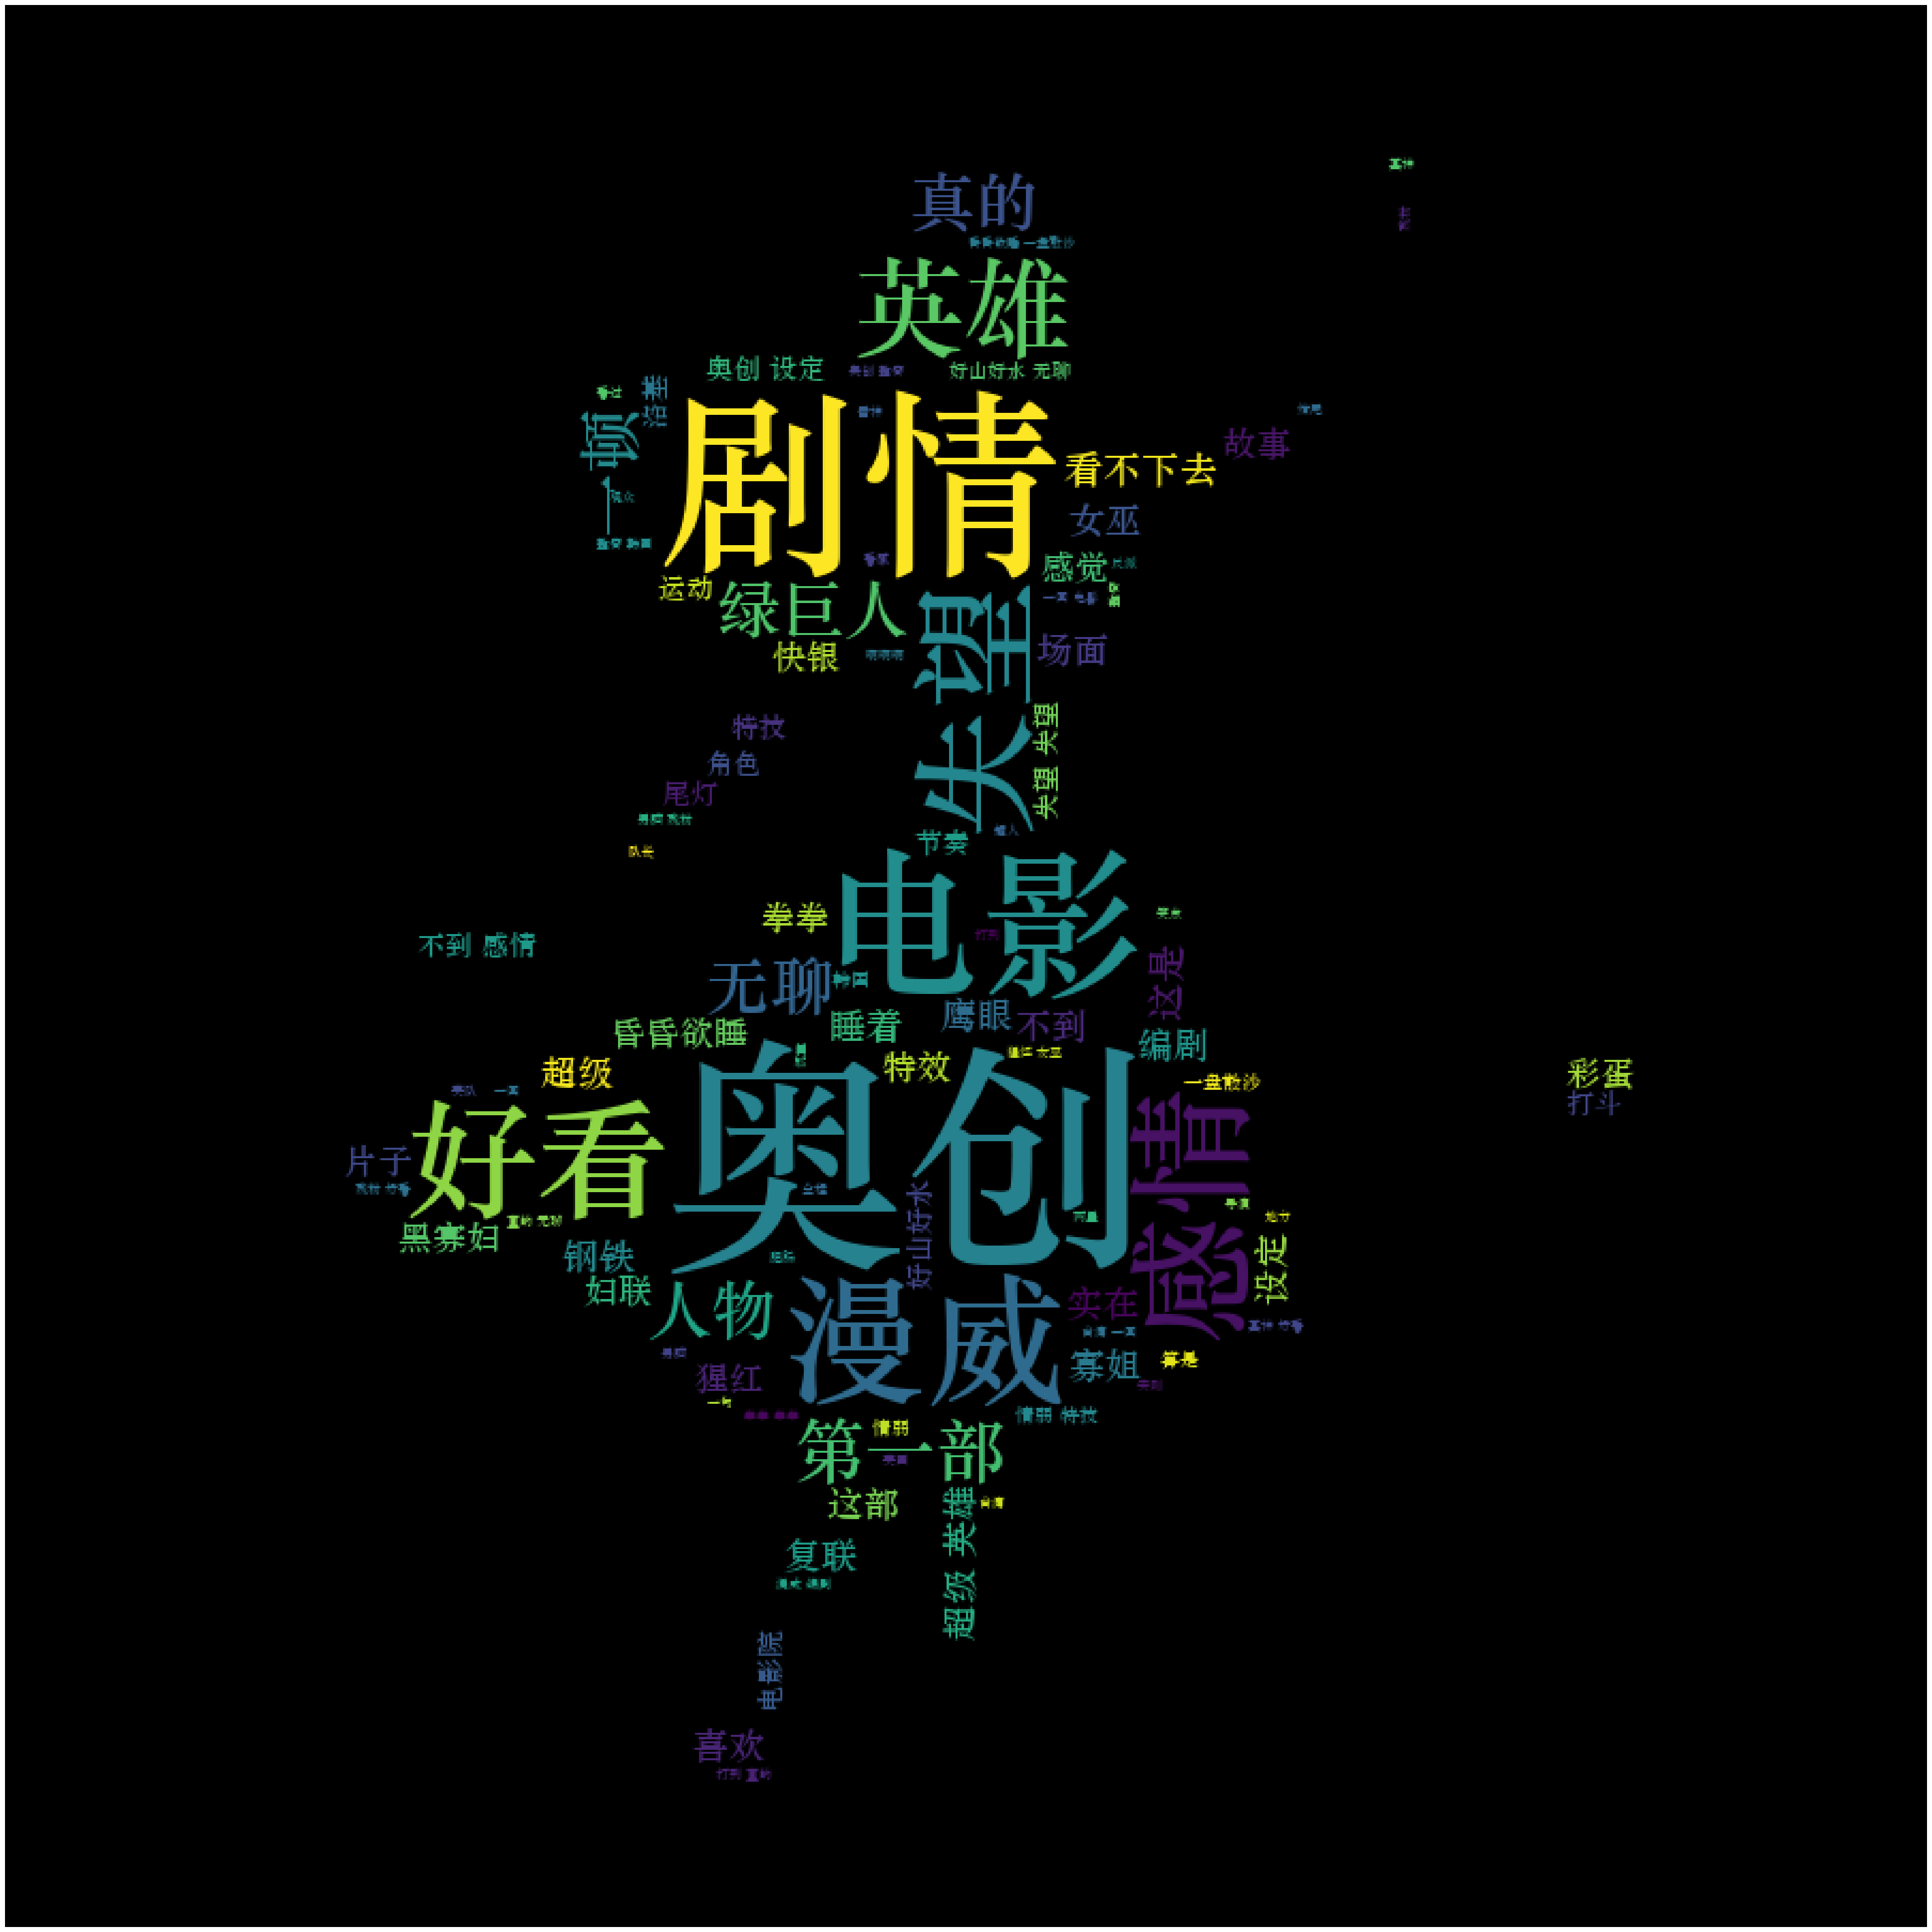

In [20]:
#词云
from wordcloud import WordCloud
from PIL import Image
bgimg=np.array(Image.open("alice_mask.png"))  #自选背景图片

wc = WordCloud(background_color='black',mask=bgimg,font_path='C:\Windows\Fonts\STZHONGS.TTF',max_words=100,width=800,height=800)
wwc = wc.generate_from_frequencies(words_dict) #生成词云
wwc.to_file('ciyun.png')#词云输出到图片
plt.figure(figsize=(50,50))
plt.imshow(wwc)
plt.axis("off")
plt.show()